## Final Project Submission

Please fill out:
* Student name: Edward Cheng
* Student pace: Self paced
* Scheduled project review date/time: August 10, 2020
* Instructor name: Jeff Herman
* Blog post URL: https://medium.com/@edwardcheng22/clean-water-basic-toilets-and-good-hygiene-practices-are-essential-for-the-survival-and-eef96644c938


# 1) Initial Set up

<b>Import libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, roc_curve, auc, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

<b>Import Data</b>

In [2]:
df_1 = pd.read_csv('Tanzanian_data_set.csv')
df_1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# Import the training set labels
df_2 = pd.read_csv('Tanzanian_labels.csv')
df_2.drop('id', axis = 1, inplace = True)
df_2.head()

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [4]:
# Join both data sets together, but get rid of the duplicated id column
df = pd.concat([df_1, df_2], axis = 1)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Inspect the columns

In [5]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [6]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


There are only 10 numerical columns. I will elect to get rid of 'num_private' due to its confusing distribution(or lackof)

In [7]:
df.drop(['num_private'], axis = 1, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# 2) Data Cleaning

We are now going to proceed with the Data Cleaning Process. Throughout this, we will investigate the following:

- Casting columns to the appropriate data types
- Identifying and dealing with null values appropriately
- Checking for Outliers and filtering dataset further
- Dealing with categorical variables

<b>1) Casting columns to the appropriate data types</b>

Check index and column dtypes to identify which data types are not accurate

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

Only one variable needs to be changed to the appropriate data type:
   - Data_recorded: needs to be converted to datatime


In [9]:
# Convert data_recorded column to datetime
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [10]:
print(df.date_recorded.dtype)

datetime64[ns]


<b>2) Identifying and dealing with null values appropriately 

Before figuring out the NA values, I want to take a closer look at several different pairings of variables that seem to be repeated based on the kaggle data set's descriptions of the columns. 

In [11]:
df[['subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']]

,subvillage,region,region_code,district_code,lga,ward
0,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Nyamara,Mara,20,2,Serengeti,Natta
2,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
...,...,...,...,...,...,...
59395,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi
59396,Igumbilo,Iringa,11,4,Njombe,Ikondo
59397,Madungulu,Mbeya,12,7,Mbarali,Chimala
59398,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu


it seems redundant to keep both region_code and district_code, so let's get rid of one of them. We will keep region and subvillage because they provide meaningful information. Lga presumably stands for local government authority (the location of it). A ward is an administrative structure for one single town or portion of a bigger town 

In [12]:
df.drop('district_code', axis = 1, inplace = True)

In [13]:
df[['scheme_management', 'scheme_name']]

,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
...,...,...
59395,Water Board,Losaa Kia water supply
59396,VWC,Ikondo electrical water sch
59397,VWC,NaN
59398,VWC,NaN


Scheme_management and scheme_name are both relatively similar features, as they both list out who operates the waterpoint. With this in mind, let's get rid of one of the two columns, and I will get rid of scheme_name because it lacks many more values than scheme_management. 

In [14]:
df.drop('scheme_name', axis = 1, inplace = True)

In [15]:
df[['extraction_type_group', 'extraction_type_class', 'extraction_type']]

,extraction_type_group,extraction_type_class,extraction_type
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,handpump,swn 80
59398,nira/tanira,handpump,nira/tanira


All three features are very similar, but extraction_type and extraction_type_group seem to be identical as opposed to extraction_type_class, so since there are more extraction type values that agree with the extraction_type_group and extraction_type, I will choose one of these features to keep and discard the other two

In [16]:
df.drop(['extraction_type_group', 'extraction_type_class'], axis = 1, inplace = True)

In [17]:
df[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


I noticed that these features seem to tell the same information as 'scheme_management', so I will discard both of these columns as they are not adding any relevant information.

In [18]:
df.drop(['management', 'management_group'], axis = 1, inplace = True)

In [19]:
df[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


These variables spit out the exact same information, but payment adds a extra 'pay' at the start of each row so I will delete this column as I want my data to be less messy.

In [20]:
df.drop('payment', axis = 1, inplace = True)

In [21]:
df[['water_quality', 'quality_group']]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


These features seem to tell the exact same information, except water_quality has 'soft' which can be misleading in terms of its context intepretation. Let's keep the quality_group because it has 'good' instead of 'soft' for water quality. Let's also change the quality_group name to water_quality after dropping that feature.

In [22]:
df.drop('water_quality', axis = 1, inplace = True)

In [23]:
df.rename(columns = {'quality_group': 'water_quality'}, inplace = True)

In [24]:
df[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


Drop one of these features and rename it to water_quantity

In [25]:
df.drop('quantity_group', axis = 1, inplace = True)

In [26]:
df.rename(columns = {'quantity': 'water_quantity'}, inplace = True)

In [27]:
df[['source_type', 'source_class', 'source']]

,source_type,source_class,source
0,spring,groundwater,spring
1,rainwater harvesting,surface,rainwater harvesting
2,dam,surface,dam
3,borehole,groundwater,machine dbh
4,rainwater harvesting,surface,rainwater harvesting
...,...,...,...
59395,spring,groundwater,spring
59396,river/lake,surface,river
59397,borehole,groundwater,machine dbh
59398,shallow well,groundwater,shallow well


source_type and source are more similar to each other than source_class, so let's get rid of source_class. Let's also get rid of source_type because it is more confusing because it has values of river/lake in some rows.

In [28]:
df.drop(['source_type', 'source_class'], axis = 1, inplace = True)

In [29]:
df[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


Get rid of one of these

In [30]:
df.drop('waterpoint_type_group', axis = 1, inplace = True)

Now that we have manually discarded duplicated features, let's take a preview of the new dataset before we deal with the NA values

In [31]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,VWC,False,1999,gravity,annually,good,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,Other,True,2010,gravity,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,VWC,True,1986,submersible,never pay,good,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,NaN,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   funder             55765 non-null  object        
 4   gps_height         59400 non-null  int64         
 5   installer          55745 non-null  object        
 6   longitude          59400 non-null  float64       
 7   latitude           59400 non-null  float64       
 8   wpt_name           59400 non-null  object        
 9   basin              59400 non-null  object        
 10  subvillage         59029 non-null  object        
 11  region             59400 non-null  object        
 12  region_code        59400 non-null  int64         
 13  lga                59400 non-null  object        
 14  ward  

In [33]:
# Check for any NA values present in any columns
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
wpt_name                0
basin                   0
subvillage            371
region                  0
region_code             0
lga                     0
ward                    0
population              0
public_meeting       3334
recorded_by             0
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
payment_type            0
water_quality           0
water_quantity          0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

The following features have NA values present:
 - funder
 - installer
 - subvillage
 - public_meeting
 - scheme_management
 - permit
 
 Dealing with these values can be an issue, as they are all of the data type 'object'. Let's take a look at what percentage of the data is missing values for these features.

In [34]:
na_columns = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'permit']
for col in na_columns:
    print('*' * 100)
    print(df[col].isnull().value_counts(normalize = True) * 100)
    

****************************************************************************************************
False    93.880471
True      6.119529
Name: funder, dtype: float64
****************************************************************************************************
False    93.846801
True      6.153199
Name: installer, dtype: float64
****************************************************************************************************
False    99.375421
True      0.624579
Name: subvillage, dtype: float64
****************************************************************************************************
False    94.387205
True      5.612795
Name: public_meeting, dtype: float64
****************************************************************************************************
False    93.473064
True      6.526936
Name: scheme_management, dtype: float64
****************************************************************************************************
False    94.855219
True      5.14

Excluding permit, on average, the NA values in each respective column is approx 6%. Because these NA values are of object data type we can't really fill in these values with anything. Given that the NA values are an insignificant amount, we can can replace these values with the string 'Not known'

In [35]:
df.loc[:, ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'permit']] = df.loc[:, ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'permit']].fillna('Not Known')

In [36]:
df.isnull().sum()

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
basin                0
subvillage           0
region               0
region_code          0
lga                  0
ward                 0
population           0
public_meeting       0
recorded_by          0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
payment_type         0
water_quality        0
water_quantity       0
source               0
waterpoint_type      0
status_group         0
dtype: int64

<b>3) Checking for Outliers and filtering dataset further</b>

In [37]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,30500.000000,2013.000000


In [38]:
numerical_cols = ['gps_height', 'region_code', 'population', 'construction_year']
for col in numerical_cols:
    print('{}'.format(col))
    print(df[col].value_counts(normalize = True))
    print('-' * 100)
    print('\n')
    

gps_height
 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64
----------------------------------------------------------------------------------------------------


region_code
11    0.089226
17    0.084360
12    0.078098
3     0.073721
5     0.068013
18    0.055960
19    0.051296
2     0.050909
16    0.047407
10    0.044444
4     0.042306
1     0.037054
13    0.035236
14    0.033316
20    0.033148
15    0.030438
6     0.027088
21    0.026650
80    0.020842
60    0.017256
90    0.015438
7     0.013552
99    0.007121
9     0.006566
24    0.005488
8     0.005051
40    0.000017
Name: region_code, dtype: float64
----------------------------------------------------------------------------------------------------


population
0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     

In [39]:
# bin the construction years using dummy var, and make 0's not known if there is no relationship
# put your continous variables in the borouta algorithm

There are many situations where the majority of the data set is comprised of values being 0, but these could actually be meaningful information, so let's keep these values for now except construction year. Having a construction year or 0 does not provide any information at all, so let's bin the years together first

In [40]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
cat_columns

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'payment_type',
 'water_quality',
 'water_quantity',
 'source',
 'waterpoint_type',
 'status_group']

In [41]:
for col in cat_columns:
    print('{}'.format(col))
    print(df[col].unique())
    print('-' * 100)
    print('\n')

funder
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']
----------------------------------------------------------------------------------------------------


installer
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
----------------------------------------------------------------------------------------------------


wpt_name
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
----------------------------------------------------------------------------------------------------


basin
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
----------------------------------------------------------------------------------------------------


subvillage
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
----------------------------------------------------------------------------------------------------


region
['Iringa' 'Mara

Now we will look into performing dummy variable transformations. Just like we saw in the last project, I will only perform dummy transformations on nominal variables. I have deemed the following to be nominal:

 - funder
 - installer
 - wpt_name
 - basin
 - subvillage
 - region
 - lga
 - ward
 - recorded_by
 - scheme_management
 - extraction_type
 - payment_type
 - water_quality
 - source
 - waterpoint_type

In [42]:
# find the top 5 most frequently seen values to see if transforming them using dummy variables is appropriate

In [43]:
for col in cat_columns:
    print('The Percentage of the top 5 most frequently seen values in {} are: '.format(col))
    print(df[col].value_counts(normalize = True).head(5).sum() * 100)
    print('-' * 100)

The Percentage of the top 5 most frequently seen values in funder are: 
32.72053872053872
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in installer are: 
42.33670033670034
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in wpt_name are: 
11.782828282828282
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in basin are: 
69.66498316498317
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in subvillage are: 
3.8047138047138054
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most fr

funder, installer, wpt_name, ward, lga need further investigation, but as for the rest of the variables, we can filter out the rest of the unwanted data

In [44]:
filtered_cat_columns = ['basin', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'payment_type', 'water_quality', 'water_quantity', 'source', 'waterpoint_type', 'status_group']
for col in filtered_cat_columns:
    print('The Top 5 most frequently seen values in {} are: '.format(col))
    print(df[col].value_counts(normalize = True).head(5))
    print('-' * 100)

The Top 5 most frequently seen values in basin are: 
Lake Victoria      0.172525
Pangani            0.150505
Rufiji             0.134276
Internal           0.131061
Lake Tanganyika    0.108283
Name: basin, dtype: float64
----------------------------------------------------------------------------------------------------
The Top 5 most frequently seen values in public_meeting are: 
True         0.858771
False        0.085101
Not Known    0.056128
Name: public_meeting, dtype: float64
----------------------------------------------------------------------------------------------------
The Top 5 most frequently seen values in recorded_by are: 
GeoData Consultants Ltd    1.0
Name: recorded_by, dtype: float64
----------------------------------------------------------------------------------------------------
The Top 5 most frequently seen values in scheme_management are: 
VWC                0.619411
WUG                0.087643
Not Known          0.065269
Water authority    0.053081
WUA       

In [45]:
filtered_drop_basin = df.loc[(~df['basin'].str.contains('Victoria')) & (~df['basin'].str.contains('Pangani')) 
                    & (~df['basin'].str.contains('Rufiji')) & (~df['basin'].str.contains('Internal')) 
                    & (~df['basin'].str.contains('Tanganyika'))].index
df.drop(filtered_drop_basin, inplace = True)

In [46]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,Other,True,2010,gravity,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe multiple,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,VWC,True,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional


In [47]:
# Scheme Management
filtered_drop_management = df.loc[(~df['scheme_management'].str.contains('VWC')) & (~df['scheme_management'].str.contains('WUG')) 
         & (~df['scheme_management'].str.contains('Not Known')) & (~df['scheme_management'].str.contains('Water authority')) 
         & (~df['scheme_management'].str.contains('WUA'))].index
df.drop(filtered_drop_management, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe multiple,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,VWC,True,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,non functional


In [48]:
# Extraction type
filtered_drop_extraction = df.loc[(~df['extraction_type'].str.contains('gravity')) & (~df['extraction_type'].str.contains('nira/tanira')) 
         & (~df['extraction_type'].str.contains('other')) & (~df['extraction_type'].str.contains('submersible')) 
         & (~df['extraction_type'].str.contains('swn 80'))].index
df.drop(filtered_drop_extraction, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe multiple,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,VWC,True,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,non functional


In [49]:
# Payment type
filtered_drop_payment = df.loc[(~df['payment_type'].str.contains('never pay')) & (~df['payment_type'].str.contains('per bucket')) 
         & (~df['payment_type'].str.contains('monthly')) & (~df['payment_type'].str.contains('unknown')) 
         & (~df['payment_type'].str.contains('on failure'))].index
df.drop(filtered_drop_payment, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe multiple,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,VWC,True,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,non functional


In [50]:
# Source
filtered_drop_source = df.loc[(~df['source'].str.contains('spring')) & (~df['source'].str.contains('shallow well')) 
         & (~df['source'].str.contains('machine dbh')) & (~df['source'].str.contains('river')) 
         & (~df['source'].str.contains('rainwater harvesting'))].index
df.drop(filtered_drop_source, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,functional


In [51]:
filtered_drop_source = df.loc[(~df['source'].str.contains('spring')) & (~df['source'].str.contains('shallow well')) 
         & (~df['source'].str.contains('machine dbh')) & (~df['source'].str.contains('river')) 
         & (~df['source'].str.contains('rainwater harvesting'))].index
df.drop(filtered_drop_source, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,functional


Now that all the data is filtered, we can now deal with the continous variables and the other categorical variables funder, installer, wpt_name, ward, lga which could not be filtered for further. We will use a algorithm called the Boruta algorithm

In [52]:
# Transform the status group into integers for the boruta algorithm
df['status_group'].replace({'functional': '0', 'non functional': '1', 'functional needs repair': '2'}, inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,1
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,1
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0


In [53]:
# Convert status group to integer 
df.status_group.astype({'status_group': 'int64'}).dtypes

dtype('int64')

In [54]:
# Create a dataset with just the continous variables
df_1 = df.copy()
df_1 = df_1.select_dtypes(exclude=['object'])
df_1 = df_1.drop('id', axis = 1)
df_1.head()

,amount_tsh,date_recorded,gps_height,longitude,latitude,region_code,population,construction_year
4,0.0,2011-07-13,0,31.130847,-1.825359,18,0,0
6,0.0,2012-10-01,0,33.362410,-3.766365,17,0,0
7,0.0,2012-10-09,0,32.620617,-4.226198,17,0,0
9,0.0,2011-08-03,0,30.626991,-1.257051,18,0,0
14,0.0,2012-10-20,0,34.364073,-3.629333,17,0,0


In [55]:
# Convert date_recorded into months
df_1['date_recorded'] = df_1['date_recorded'].dt.month
df_1.head()

,amount_tsh,date_recorded,gps_height,longitude,latitude,region_code,population,construction_year
4,0.0,7,0,31.130847,-1.825359,18,0,0
6,0.0,10,0,33.362410,-3.766365,17,0,0
7,0.0,10,0,32.620617,-4.226198,17,0,0
9,0.0,8,0,30.626991,-1.257051,18,0,0
14,0.0,10,0,34.364073,-3.629333,17,0,0


In [56]:
df_1.head()

,amount_tsh,date_recorded,gps_height,longitude,latitude,region_code,population,construction_year
4,0.0,7,0,31.130847,-1.825359,18,0,0
6,0.0,10,0,33.362410,-3.766365,17,0,0
7,0.0,10,0,32.620617,-4.226198,17,0,0
9,0.0,8,0,30.626991,-1.257051,18,0,0
14,0.0,10,0,34.364073,-3.629333,17,0,0


In [57]:
x = df_1
y = df['status_group']
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# initialize Boruta
forest = RandomForestRegressor(
        n_jobs = -1,
        max_depth = 5
)
boruta = BorutaPy(
    estimator = forest,
    n_estimators = 'auto',
    max_iter = 100 # number of trials to perform
)

# fit Boruta (it acceps np.array, not pd.DataFrame)
boruta.fit(np.array(x), np.array(y))

# print results
green_area = x.columns[boruta.support_].to_list()
blue_area = x.columns[boruta.support_weak_].to_list()

# Green area is the region that accepts the features based on its importance and blue isn't
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'region_code', 'population', 'construction_year']
features in the blue area: []


In [58]:
print(boruta.ranking_) 

[1 1 1 1 1 1 1 1]


In [59]:
df_1 = df_1.drop(['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude'], axis = 1)
df_1.head()

,region_code,population,construction_year
4,18,0,0
6,17,0,0
7,17,0,0
9,18,0,0
14,17,0,0


In [60]:
x = df_1
y = df['status_group']
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# initialize Boruta
forest = RandomForestRegressor(
        n_jobs = -1,
        max_depth = 5
)
boruta = BorutaPy(
    estimator = forest,
    n_estimators = 'auto',
    max_iter = 100 # number of trials to perform
)

# fit Boruta (it acceps np.array, not pd.DataFrame)
boruta.fit(np.array(x), np.array(y))

# print results
green_area = x.columns[boruta.support_].to_list()
blue_area = x.columns[boruta.support_weak_].to_list()

# Green area is the region that accepts the features based on its importance and blue isn't
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['region_code', 'population', 'construction_year']
features in the blue area: []


It looks like all the variables seems to have some degree of importance to it. So we will keep all of them for now and investigate them further in the EDA section

In [61]:
# Rename status_group to well_condition
df.rename(columns={'status_group': 'well_condition'}, inplace=True)

In [62]:
# Drop id column, and preview cleaned data set
df.drop('id', axis = 1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0
6,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,1
7,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,1
9,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
14,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,Mwabasabi,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59388,0.0,2013-01-29,Kidep,1414,DWE,30.692400,-3.593827,Kwa Philipo Kibeba,Lake Tanganyika,Kumwambu,...,VWC,True,1995,gravity,unknown,good,insufficient,spring,improved spring,0
59390,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,Lake Tanganyika,Kitonto,...,VWC,False,1991,swn 80,never pay,good,insufficient,machine dbh,hand pump,0
59391,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,Pangani,Maore Kati,...,Water authority,True,1967,gravity,never pay,good,enough,river,communal standpipe,1
59397,0.0,2011-04-11,Not Known,0,Not Known,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,VWC,False,0,swn 80,monthly,fluoride,enough,machine dbh,hand pump,0


# EDA 

Questions:

 - Where are the most functional wells located?
 - Investigating the condition of wells based on construction year and date recorded
 - What are the most popular water basins?
 - What is the most popular way of extracting water for the most functional wells? 
 - How is the water quality and quantity for the wells? What are their main source for the water?
 - Most popular waterpoint types?
 - Which management was the most popular?

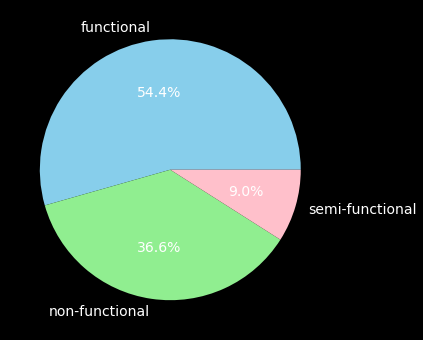

In [63]:
# Let's get a general look at the number of functional, non-functional, and semi-functional wells
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
plt.figure(figsize=(8,6))
df['well_condition'].value_counts().plot.pie(labels= well_condition_labels,
                                    autopct='%1.1f%%',
                                    colors=['skyblue', 'lightgreen', 'pink'],
                                    textprops={'fontsize': 14})
plt.ylabel('')
plt.show()

<b>Where are the most functional wells located?</b>

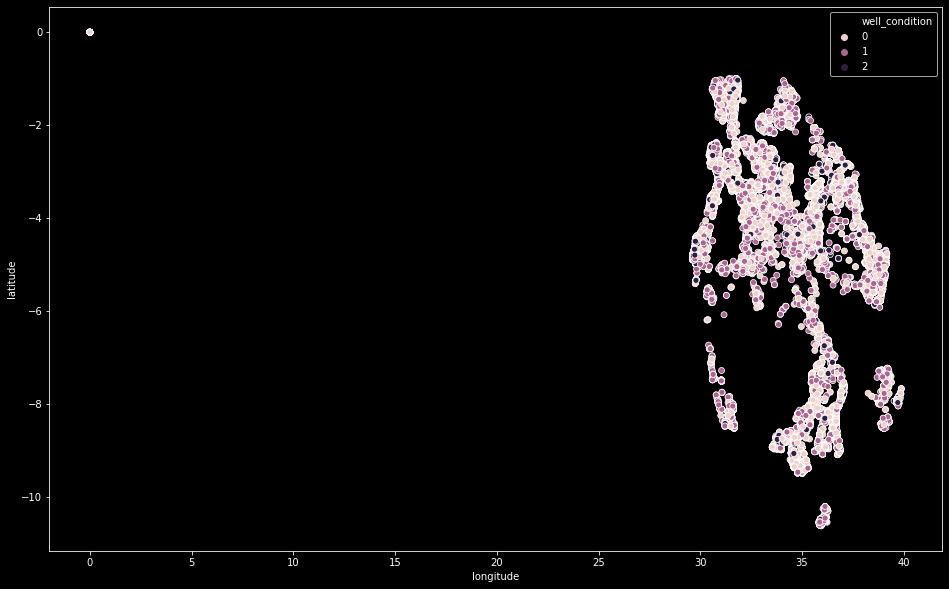

In [64]:
fig = plt.figure(figsize=(16,10))
sns.scatterplot(x = df.longitude, y = df.latitude, hue = df.well_condition)

In [65]:
df_date_recorded = df.copy()
df_date_recorded['date_recorded'] = df_date_recorded['date_recorded'].dt.month
df_date_recorded['date_recorded'] = df_date_recorded['date_recorded'].astype(str)
df_date_recorded['date_recorded'].replace({'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'}, inplace = True)

In [66]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,1
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,1
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0


<b>Investigating the condition of wells based on construction year and date recorded</b>

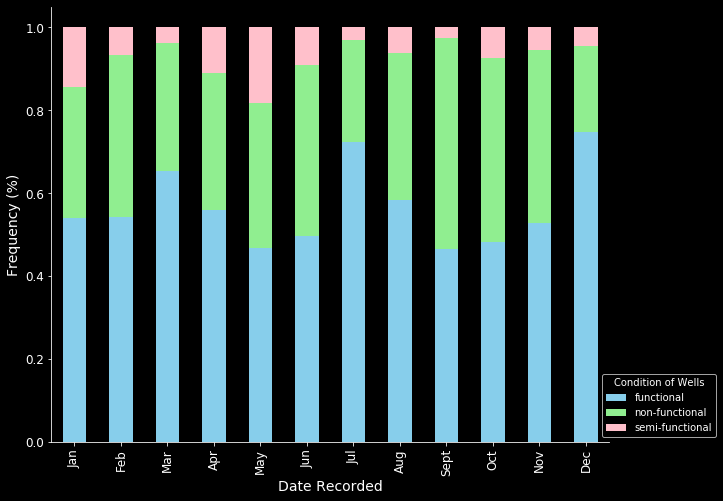

In [67]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax = df_date_recorded['well_condition'].groupby(by=df_date_recorded['date_recorded']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Date Recorded', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(12), labels=month_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

It seems like during the 3 year span, the most amount of functional wells were recorded in the months of March, July and December. The most non-functional wells were recorded in the months of June, Sept, Oct, and Nov. Transforming the months into dummy_variables seems like a option now due to noticeable trends. Before we do that, let's investigate the construction years in relation to the well conditions. I will group by construction years into groups of 5 years.

In [68]:
df_date_recorded.construction_year.replace(0, np.nan, inplace = True)

In [69]:
a = list(range(1955,2016,5))
cut_bins = [-1]
cut_bins.extend(a)
cut_labels = ['not available', '56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-00','01-05','06-10','11-15']
df_date_recorded.loc[:, 'construction_year_bin'] = pd.cut(df_date_recorded['construction_year'], bins = cut_bins, labels = cut_labels)

df_date_recorded.construction_year_bin

4          NaN
6          NaN
7          NaN
9          NaN
14         NaN
         ...  
59388    91-95
59390    91-95
59391    66-70
59397      NaN
59398      NaN
Name: construction_year_bin, Length: 26715, dtype: category
Categories (13, object): [not available < 56-60 < 61-65 < 66-70 ... 96-00 < 01-05 < 06-10 < 11-15]

In [70]:
df_date_recorded.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition,construction_year_bin
59388,72559,0.0,Jan,Kidep,1414,DWE,30.692400,-3.593827,Kwa Philipo Kibeba,Lake Tanganyika,...,True,1995.0,gravity,unknown,good,insufficient,spring,improved spring,0,91-95
59390,13677,0.0,Aug,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,Lake Tanganyika,...,False,1991.0,swn 80,never pay,good,insufficient,machine dbh,hand pump,0,91-95
59391,44885,0.0,Aug,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,Pangani,...,True,1967.0,gravity,never pay,good,enough,river,communal standpipe,1,66-70
59397,37057,0.0,Apr,Not Known,0,Not Known,34.017087,-8.750434,Mashine,Rufiji,...,False,NaN,swn 80,monthly,fluoride,enough,machine dbh,hand pump,0,NaN
59398,31282,0.0,Mar,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,True,NaN,nira/tanira,never pay,good,insufficient,shallow well,hand pump,0,NaN


In [71]:
# Convert year constructed into strings
df_date_recorded['construction_year_bin'] = df_date_recorded['construction_year_bin'].astype(str)

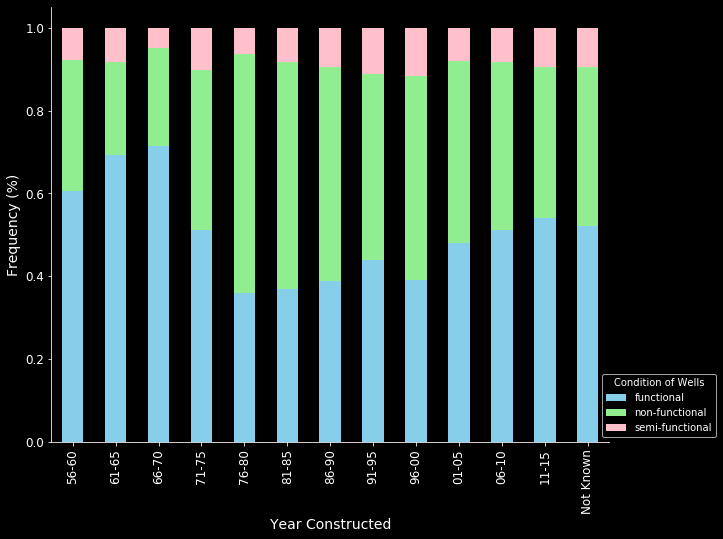

In [72]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
month_labels = ['56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-00', '01-05', '06-10', '11-15', 'Not Known']
ax = df_date_recorded['well_condition'].groupby(by=df_date_recorded['construction_year_bin']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Year Constructed', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(13), labels=month_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

There seems to be a trend here, newer constructed wells actually tends to be less functional. Wells constructed during 1955-1970 seemed to be the most functional and wells constructed during 1975 to 2000 seemed to have the most non-functional wells. I will definitely consider binning the construction years and transform them into dummy variables.

<b>What are the most popular water basins?</b>

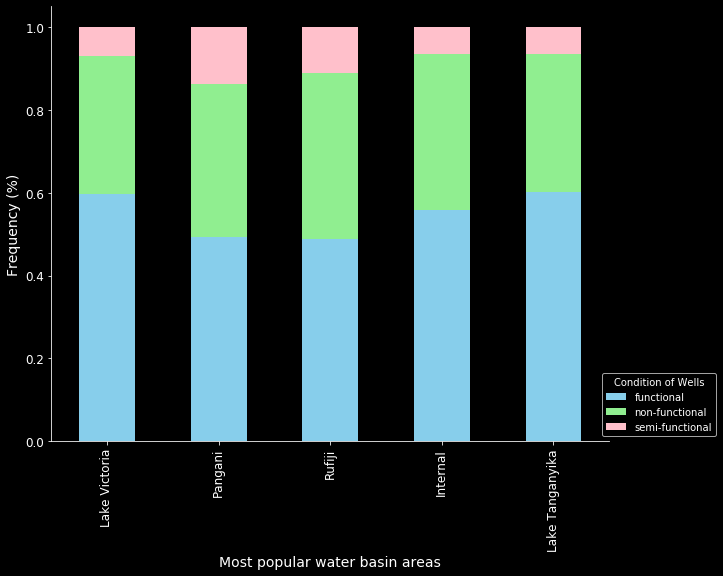

In [73]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
basin_labels = ['Lake Victoria', 'Pangani', 'Rufiji', 'Internal', 'Lake Tanganyika']
ax = df['well_condition'].groupby(by=df['basin']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Most popular water basin areas', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(5), labels=basin_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

No clear trend here, but Lake Victoria and Lake Tanganyika appear to have the highest number of functioning water wells

<b>Most popular way of extracting water for the most functional wells?</b>

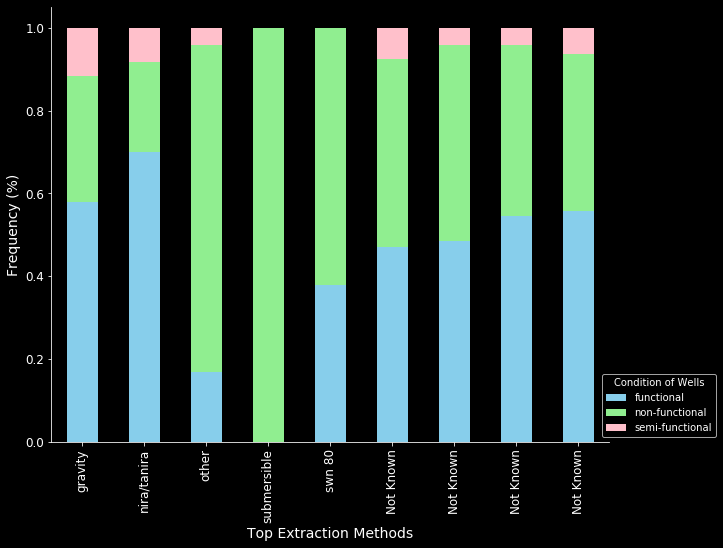

In [74]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
extraction_labels = ['gravity', 'nira/tanira','other', 'submersible', 'swn 80', 'Not Known', 'Not Known', 'Not Known', 'Not Known']
ax = df['well_condition'].groupby(by=df['extraction_type']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Top Extraction Methods', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(9), labels=extraction_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

<b>Best water sources and water quality and water quantity</b>

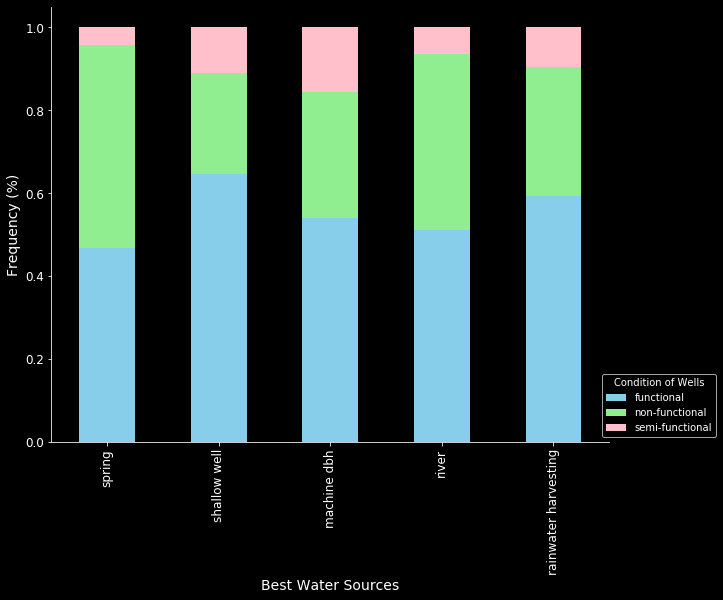

In [75]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
source_labels = ['spring', 'shallow well', 'machine dbh', 'river', 'rainwater harvesting']    
ax = df_date_recorded['well_condition'].groupby(by=df_date_recorded['source']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Best Water Sources', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(5), labels=source_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()


Shallow wells appear to be the best water source for functional wells and spring water is the worst

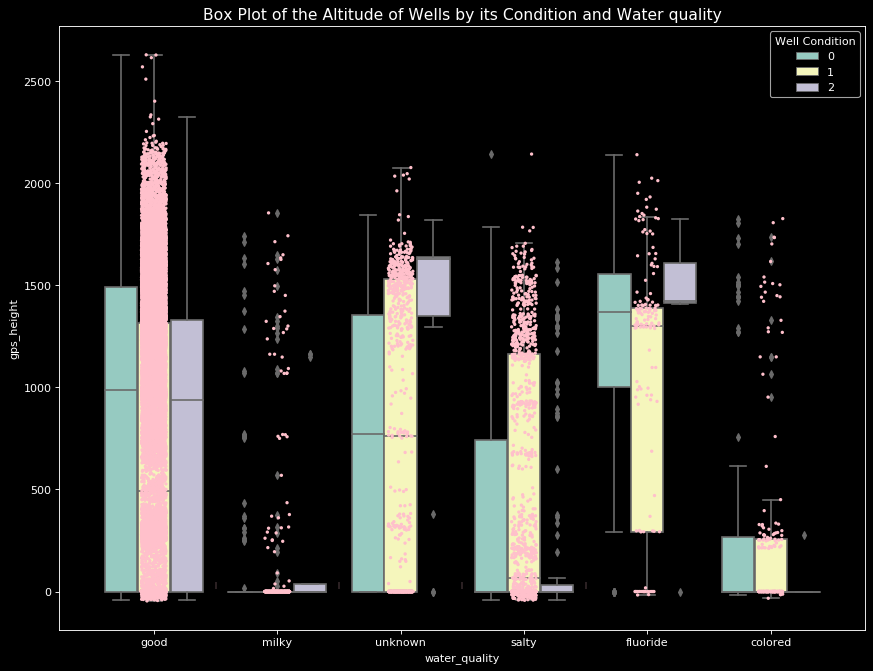

In [76]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='water_quality', y='gps_height', data=df, hue='well_condition')
sns.stripplot(x='water_quality', y='gps_height', data=df, color='pink', size=3, jitter=1)

for i in range(len(df['water_quantity'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='pink', alpha=0.2)

# Decoration
plt.title('Box Plot of the Altitude of Wells by its Condition and Water quality', fontsize=14)
plt.legend(title='Well Condition')
plt.show()

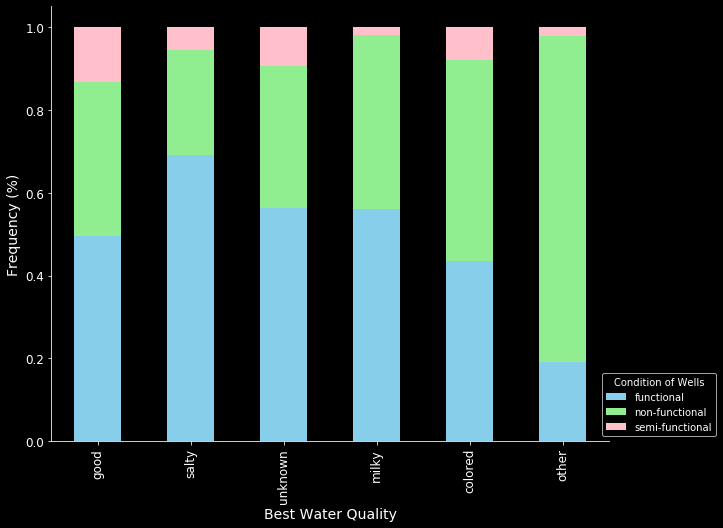

In [77]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
quality_labels = ['good', 'salty', 'unknown', 'milky', 'colored', 'other']    


ax1 = df_date_recorded['well_condition'].groupby(by=df_date_recorded['water_quality']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


plt.xlabel('Best Water Quality', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(6), labels=quality_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

Although 85% of the water quality is 'good', if you calculate the relative percentage of functional wells to their respective categories, the water quality of 'salty' actually had a better proprionate of functional wells, which could indicate something noteworthy. It is also unfair to conclude that salty quality is better than good quality because there are way more data for the 'good' category. Now let's take a look at the most frequently seen water quantity

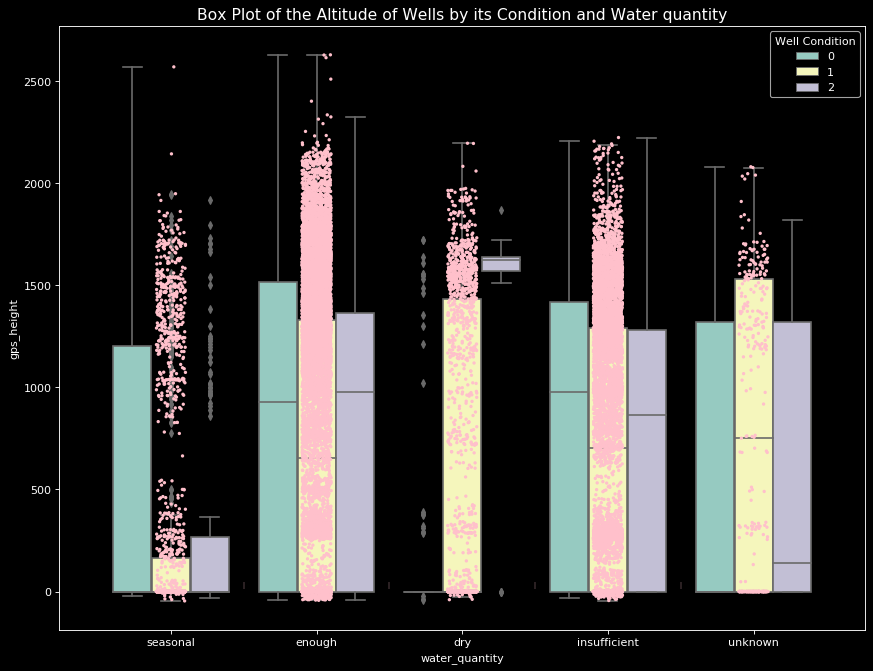

In [78]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='water_quantity', y='gps_height', data=df, hue='well_condition')
sns.stripplot(x='water_quantity', y='gps_height', data=df, color='pink', size=3, jitter=1)

for i in range(len(df['water_quantity'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='pink', alpha=0.2)

# Decoration
plt.title('Box Plot of the Altitude of Wells by its Condition and Water quantity', fontsize=14)
plt.legend(title='Well Condition')
plt.show()

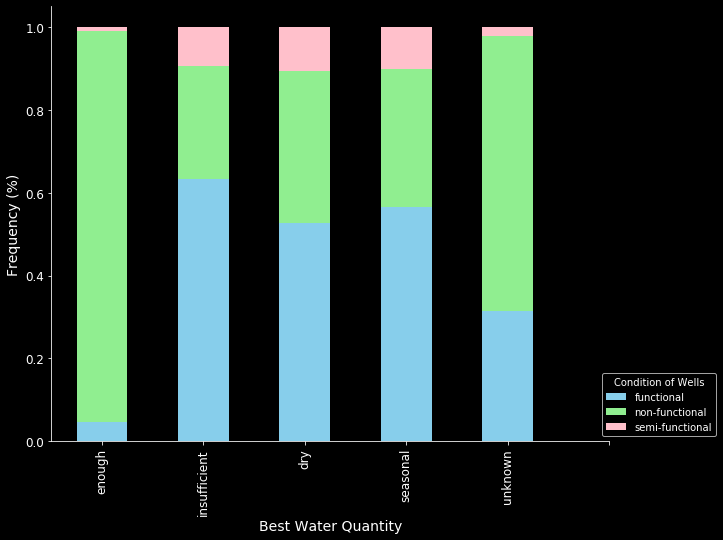

In [79]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
quantity_labels = ['enough', 'insufficient', 'dry', 'seasonal', 'unknown']    


ax1 = df_date_recorded['well_condition'].groupby(by=df_date_recorded['water_quantity']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


plt.xlabel('Best Water Quantity', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(6), labels=quantity_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

This is a signficant finding, as I would have assumed that having enough water would possibly correlate to more functioning wells. However, it turns out when the water quantity is insufficient or seasonal, it yields to more functional wells. Now let's take a look at the best types of waterpoint

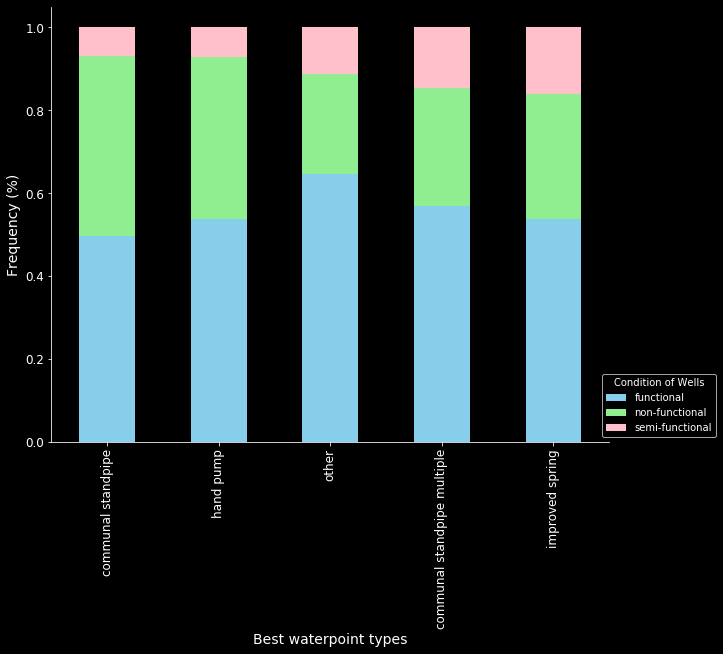

In [80]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
waterpoint_labels = ['communal standpipe', 'hand pump', 'other', 'communal standpipe multiple','improved spring']
ax = df_date_recorded['well_condition'].groupby(by=df_date_recorded['scheme_management']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Best waterpoint types', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(5), labels=waterpoint_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

There seems to be no clear trend, all the waterpoint types appear to produce the same information.

<b>Top Managements</b>

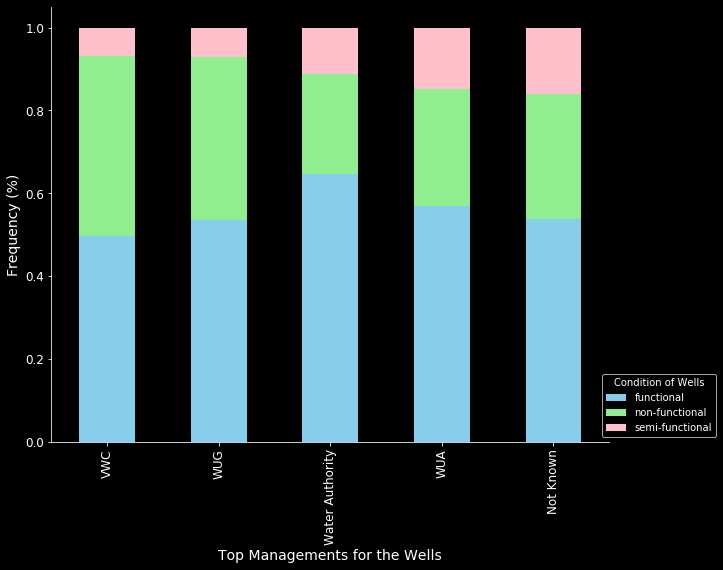

In [81]:
well_condition_labels = ['functional', 'non-functional', 'semi-functional']
management_labels = ['VWC', 'WUG', 'Water Authority', 'WUA', 'Not Known']
ax = df_date_recorded['well_condition'].groupby(by=df_date_recorded['scheme_management']
                       ).value_counts(normalize = True).unstack().plot(kind='bar', 
                                                        stacked=True,
                                                        color=['skyblue', 
                                                                'lightgreen', 
                                                                'pink'], figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Top Managements for the Wells', size=14)
plt.ylabel('Frequency (%)', size=14)
plt.xticks(ticks=range(5), labels=management_labels, size=12)
plt.yticks(size=12)
plt.legend(title='Condition of Wells', labels=well_condition_labels, 
           loc='lower right', bbox_to_anchor=(1.2, 0))
plt.show()

There does not seem to be any clear management advantage trends/patterns. Water authority does appear to have a slight edge over the other ones, as they manage the most functional wells and the least non-functional ones.

In [82]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,population,construction_year
count,26715.000000,26715.000000,26715.000000,26715.000000,2.671500e+04,26715.000000,26715.000000,26715.000000
mean,37054.376680,177.996429,732.181995,32.963838,-4.400172e+00,12.767958,172.082463,1228.910313
std,21360.111758,2429.913861,703.433650,7.567340,2.412251e+00,8.796448,433.510358,970.994510
min,1.000000,0.000000,-46.000000,0.000000,-1.063114e+01,1.000000,0.000000,0.000000
25%,18708.500000,0.000000,0.000000,31.807892,-5.127656e+00,4.000000,0.000000,0.000000
50%,36873.000000,0.000000,721.000000,34.553772,-3.854052e+00,15.000000,40.000000,1982.000000
75%,55434.500000,0.000000,1387.000000,36.690265,-2.991440e+00,18.000000,210.000000,2002.000000
max,74246.000000,200000.000000,2628.000000,39.878767,-2.000000e-08,80.000000,30500.000000,2013.000000


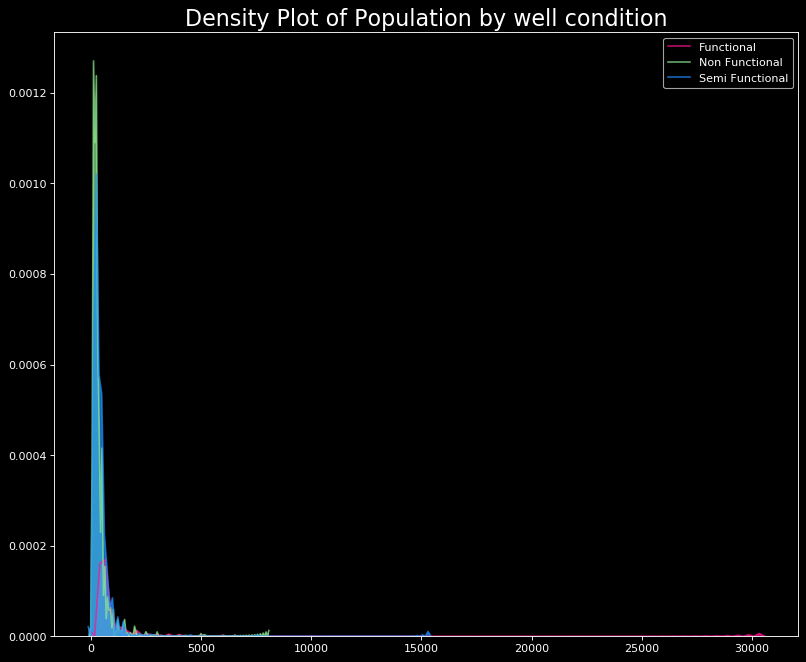

In [83]:
plt.figure(figsize=(12,10), dpi= 80)
sns.kdeplot(df.loc[df['well_condition'] == '0', "population"], shade=True, color="deeppink", label="Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '1', "population"], shade=True, color="lightgreen", label="Non Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '2', "population"], shade=True, color="dodgerblue", label="Semi Functional", alpha=.7)

# Decoration
plt.title('Density Plot of Population by well condition', fontsize=20)
plt.legend()
plt.show()

Most of the population around the wells tend to be on the smaller side, between 0 to 5000 and with an outlier of around 30500. With that in mind, let's take a look at the top 5 management. We already have a idea from earlier of what the top 5 most frequently seen management values were, and they were: VWC, WUG, Not Known, Water authority, WUA. However, this is not an order, we will now rank to see which management managed the most functional wells.                

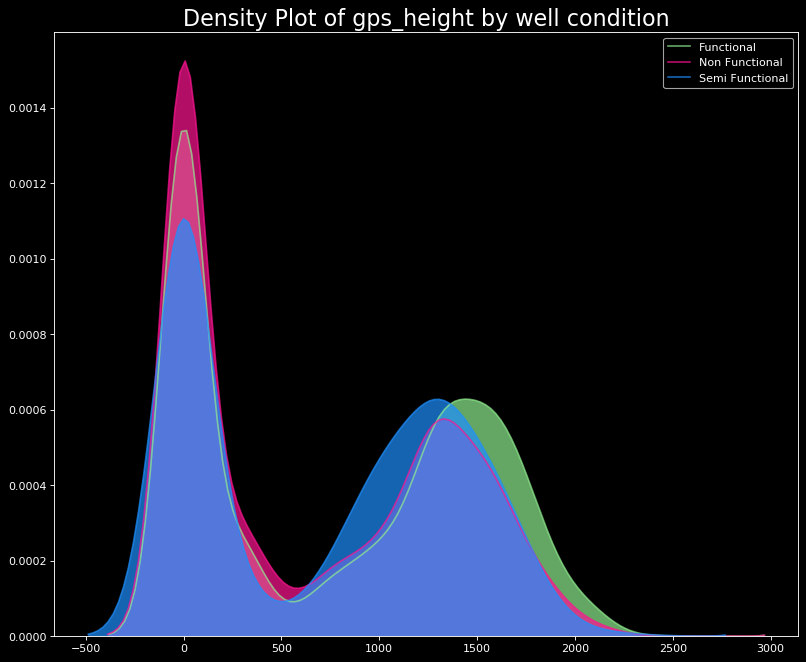

In [84]:
plt.figure(figsize=(12,10), dpi= 80)
sns.kdeplot(df.loc[df['well_condition'] == '0', "gps_height"], shade=True, color="lightgreen", label="Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '1', "gps_height"], shade=True, color="deeppink", label="Non Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '2', "gps_height"], shade=True, color="dodgerblue", label="Semi Functional", alpha=.7)

# Decoration
plt.title('Density Plot of gps_height by well condition', fontsize=20)
plt.legend()
plt.show()

The distribution of the wells appear to follow the same distribution regardless of the well condition, with slight differences. It also appears to be bi-modal distribution, as most of the values tend to appear between -500 and 500 and then between 500 and 2000

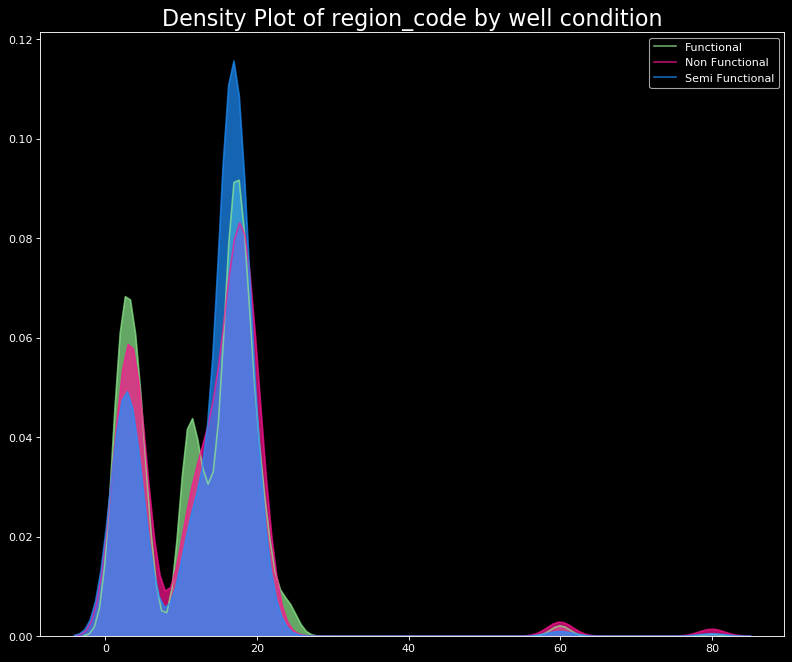

In [85]:
plt.figure(figsize=(12,10), dpi= 80)
sns.kdeplot(df.loc[df['well_condition'] == '0', "region_code"], shade=True, color="lightgreen", label="Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '1', "region_code"], shade=True, color="deeppink", label="Non Functional", alpha=.7)
sns.kdeplot(df.loc[df['well_condition'] == '2', "region_code"], shade=True, color="dodgerblue", label="Semi Functional", alpha=.7)

# Decoration
plt.title('Density Plot of region_code by well condition', fontsize=20)
plt.legend()
plt.show()

Appears to be bimodal as well. Most codes lie within a region of 0 to 25

Where are the most recently constructed wells?

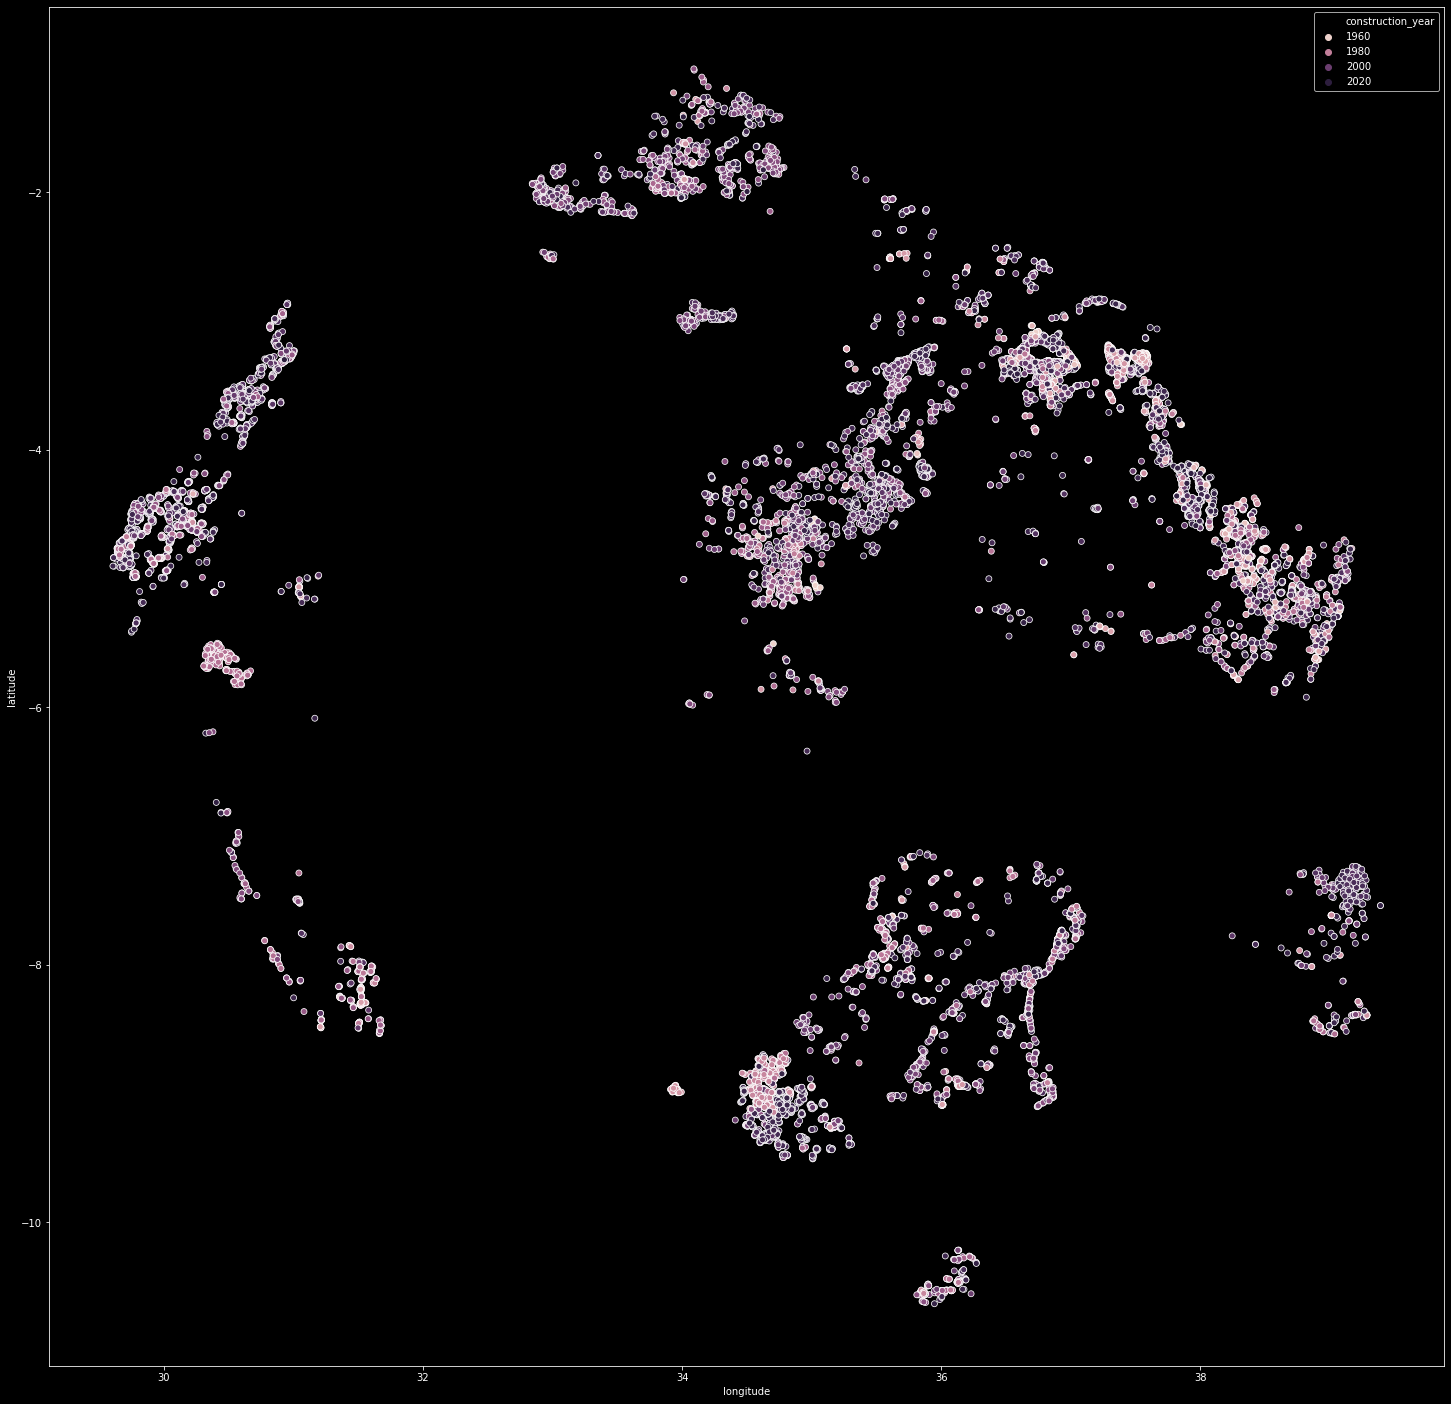

In [86]:
fig = plt.figure(figsize=(25,25))

#ALL sales in set, represents map background
sns.scatterplot(x=df_date_recorded.longitude, y=df_date_recorded.latitude, hue = df_date_recorded['construction_year'])

There is no obvious clustering, wells appear to be constructed at the same time throughout the whole map. Construction year might not have an importance, so we can bin the construction years later and see if there are any individual segments that might hold some value.

Is there a relationship between the altitude of the well and the amount of water available to the waterpoint?

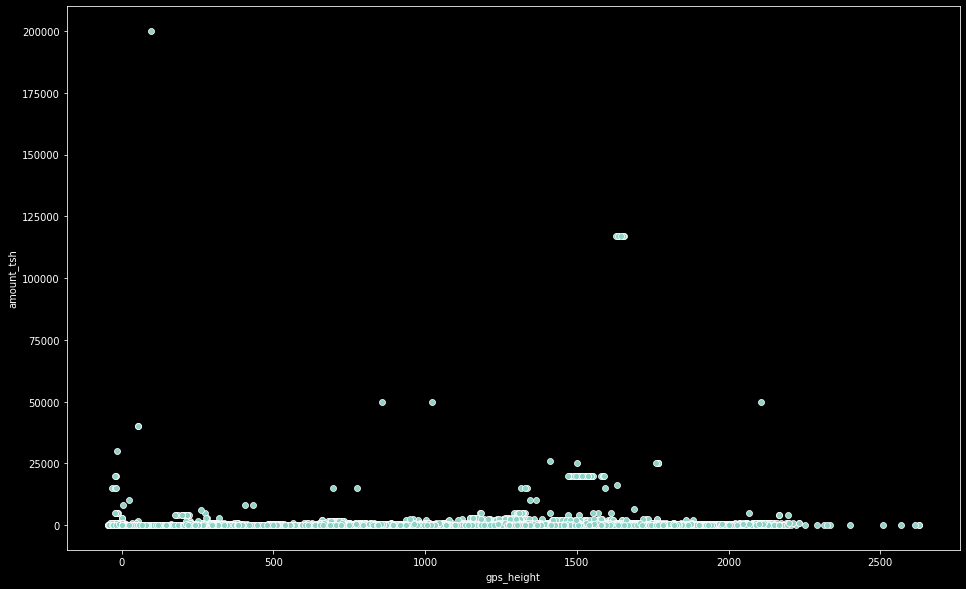

In [87]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = df['gps_height'], y = df['amount_tsh'])

No correlation at all

How about population and the amount of water available to the waterpoint?

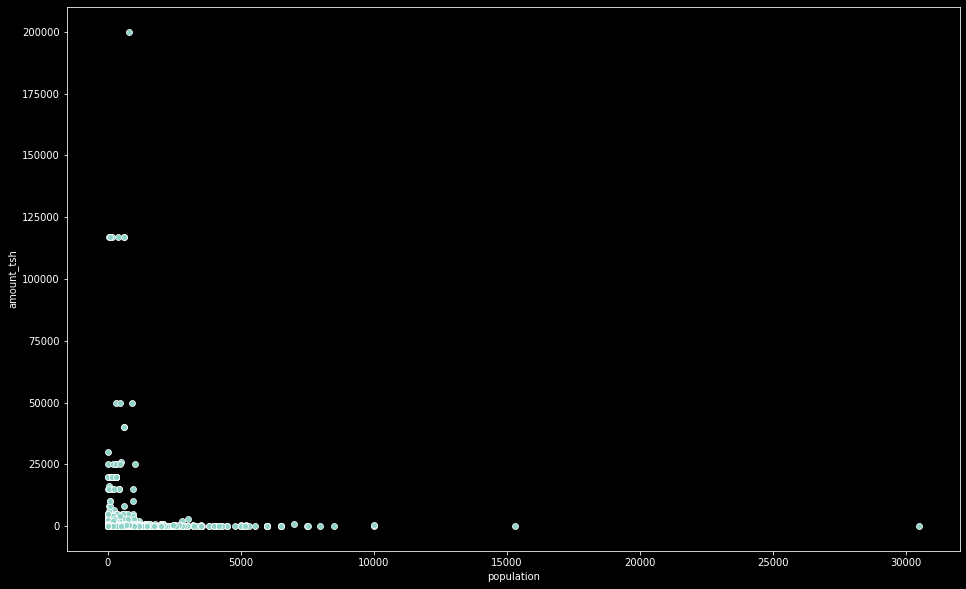

In [88]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = df['population'], y = df['amount_tsh'])

No correlation either

Summary of EDA section:

Potentially useful features
  - Date recorded
  - Construction year
  - Water sources
  - Water quantity
  - Water quality

<b>Final Data Cleaning Before Model Building</b>

In [89]:
df_final = df.copy()

In [90]:
df_final.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,1
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,1
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0


In [91]:
df_final.drop('id', axis = 1, inplace = True)

In [92]:
df_final['date_recorded'] = df_final['date_recorded'].dt.month

In [93]:
df_final.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,scheme_management,permit,construction_year,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition
4,0.0,7,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,Not Known,True,0,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0
6,0.0,10,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,VWC,True,0,swn 80,never pay,good,enough,machine dbh,hand pump,1
7,0.0,10,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,...,Not Known,True,0,nira/tanira,unknown,milky,enough,shallow well,hand pump,1
9,0.0,8,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,...,Not Known,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0
14,0.0,10,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,Mwabasabi,...,WUG,True,0,nira/tanira,never pay,good,enough,shallow well,hand pump,0


In [94]:
a = list(range(1955,2016,5))
cut_bins = [-1]
cut_bins.extend(a)
cut_labels = ['not available', '56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-00','01-05','06-10','11-15']
df_final.loc[:, 'construction_year_bin'] = pd.cut(df_final['construction_year'], bins = cut_bins, labels = cut_labels)
df_final.drop('construction_year', axis = 1, inplace = True)

In [95]:
df_final['construction_year_bin'].replace({'not available': '0', '56-60': '1958', '61-65': '1963', '66-70': '1968', '71-75': '1973', '71-75': '1973', '76-80': '1978', '81-85': '1983', '86-90': '1988', '91-95': '1993', '96-00': '1998', '01-05': '2003', '06-10': '2008', '11-15': '2013'}, inplace = True)
df_final.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,scheme_management,permit,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition,construction_year_bin
4,0.0,7,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,Not Known,True,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0,0
6,0.0,10,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,VWC,True,swn 80,never pay,good,enough,machine dbh,hand pump,1,0
7,0.0,10,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,...,Not Known,True,nira/tanira,unknown,milky,enough,shallow well,hand pump,1,0
9,0.0,8,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,...,Not Known,True,nira/tanira,never pay,good,enough,shallow well,hand pump,0,0
14,0.0,10,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,Mwabasabi,...,WUG,True,nira/tanira,never pay,good,enough,shallow well,hand pump,0,0


In [96]:
df_final.tail()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,scheme_management,permit,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition,construction_year_bin
59388,0.0,1,Kidep,1414,DWE,30.692400,-3.593827,Kwa Philipo Kibeba,Lake Tanganyika,Kumwambu,...,VWC,True,gravity,unknown,good,insufficient,spring,improved spring,0,1993
59390,0.0,8,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,Lake Tanganyika,Kitonto,...,VWC,False,swn 80,never pay,good,insufficient,machine dbh,hand pump,0,1993
59391,0.0,8,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,Pangani,Maore Kati,...,Water authority,True,gravity,never pay,good,enough,river,communal standpipe,1,1968
59397,0.0,4,Not Known,0,Not Known,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,VWC,False,swn 80,monthly,fluoride,enough,machine dbh,hand pump,0,0
59398,0.0,3,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,VWC,True,nira/tanira,never pay,good,insufficient,shallow well,hand pump,0,0


In [97]:
df_final.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,scheme_management,permit,extraction_type,payment_type,water_quality,water_quantity,source,waterpoint_type,well_condition,construction_year_bin
4,0.0,7,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,Not Known,True,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,0,0
6,0.0,10,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,VWC,True,swn 80,never pay,good,enough,machine dbh,hand pump,1,0
7,0.0,10,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,...,Not Known,True,nira/tanira,unknown,milky,enough,shallow well,hand pump,1,0
9,0.0,8,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,...,Not Known,True,nira/tanira,never pay,good,enough,shallow well,hand pump,0,0
14,0.0,10,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,Internal,Mwabasabi,...,WUG,True,nira/tanira,never pay,good,enough,shallow well,hand pump,0,0


In [98]:
df_final.describe()

,amount_tsh,date_recorded,gps_height,longitude,latitude,region_code,population
count,26715.000000,26715.000000,26715.000000,26715.000000,2.671500e+04,26715.000000,26715.000000
mean,177.996429,4.723564,732.181995,32.963838,-4.400172e+00,12.767958,172.082463
std,2429.913861,3.138749,703.433650,7.567340,2.412251e+00,8.796448,433.510358
min,0.000000,1.000000,-46.000000,0.000000,-1.063114e+01,1.000000,0.000000
25%,0.000000,2.000000,0.000000,31.807892,-5.127656e+00,4.000000,0.000000
50%,0.000000,3.000000,721.000000,34.553772,-3.854052e+00,15.000000,40.000000
75%,0.000000,7.000000,1387.000000,36.690265,-2.991440e+00,18.000000,210.000000
max,200000.000000,12.000000,2628.000000,39.878767,-2.000000e-08,80.000000,30500.000000


In [99]:
filtered_drop = df_final.loc[(df_final['amount_tsh'] > 5000) | (df_final['gps_height'] > 2000) | (df_final['region_code'] > 50) 
                             | (df_final['population'] > 500)].index
df_final.drop(filtered_drop, inplace = True)

In [100]:
df_final.describe()

,amount_tsh,date_recorded,gps_height,longitude,latitude,region_code,population
count,24154.000000,24154.000000,24154.000000,24154.000000,2.415400e+04,24154.000000,24154.000000
mean,82.440739,4.904985,691.577254,32.775457,-4.274884e+00,12.128053,98.446551
std,280.302753,3.161721,695.531404,7.869176,2.375858e+00,6.742592,134.506974
min,0.000000,1.000000,-40.000000,0.000000,-1.063114e+01,1.000000,0.000000
25%,0.000000,2.000000,0.000000,31.816034,-5.003607e+00,4.000000,0.000000
50%,0.000000,3.000000,456.000000,34.393228,-3.719568e+00,14.000000,1.000000
75%,0.000000,7.000000,1367.000000,36.686719,-2.948489e+00,18.000000,180.000000
max,5000.000000,12.000000,2000.000000,39.878767,-2.000000e-08,24.000000,500.000000


Now let's perform some more filtering for the other features that we have not touched upon, including:
 - wpt_name
 - subvillage
 - region
 - installer

We need to clean wpt_name and subvillage immensely, as there are too many different data values. Region and installer are okay.

In [101]:
df_final['wpt_name'].value_counts()

none                845
Shuleni             442
Zahanati            289
Msikitini           157
Shule Ya Msingi     125
                   ... 
Apilinali             1
Andason               1
Katirengerwa          1
Semwea A              1
Kwa Masanja Kali      1
Name: wpt_name, Length: 16403, dtype: int64

In [102]:
threshold = 365
cols = ['wpt_name']

for col in cols:
    valued_dict = dict(df_final[col].value_counts())
    safe_values = list(key for key, value in valued_dict.items() if value > threshold)
#     replace_values = list(filter(lambda x: x not in safe_values, all_values))
    df_final.loc[:, col] = df_final.loc[:, col].map(lambda y: 'other' if y not in safe_values else y)

df_final.wpt_name.value_counts()

other      22867
none         845
Shuleni      442
Name: wpt_name, dtype: int64

In [103]:
df_final['subvillage'].value_counts()

Madukani          242
Kati              198
Majengo           162
Shuleni           137
Mtakuja           113
                 ... 
Mahanga             1
Gulioni A           1
Hash Ntobo          1
Mitoo Ya Chini      1
Banawani            1
Name: subvillage, Length: 9988, dtype: int64

In [104]:
threshold = 175
cols = ['subvillage']

for col in cols:
    valued_dict = dict(df_final[col].value_counts())
    safe_values = list(key for key, value in valued_dict.items() if value > threshold)
#     replace_values = list(filter(lambda x: x not in safe_values, all_values))
    df_final.loc[:, col] = df_final.loc[:, col].map(lambda y: 'other' if y not in safe_values else y)

df_final.subvillage.value_counts()

other       23714
Madukani      242
Kati          198
Name: subvillage, dtype: int64

In [105]:
df_final['region'].value_counts()

Shinyanga      3358
Kagera         2803
Arusha         2548
Mwanza         2031
Iringa         1854
Kilimanjaro    1830
Tanga          1754
Kigoma         1598
Morogoro       1211
Manyara         990
Tabora          861
Singida         850
Dodoma          610
Mara            567
Mbeya           554
Rukwa           478
Ruvuma          178
Pwani            79
Name: region, dtype: int64

In [106]:
threshold = 2020
cols = ['region']

for col in cols:
    valued_dict = dict(df_final[col].value_counts())
    safe_values = list(key for key, value in valued_dict.items() if value > threshold)
#     replace_values = list(filter(lambda x: x not in safe_values, all_values))
    df_final.loc[:, col] = df_final.loc[:, col].map(lambda y: 'other' if y not in safe_values else y)

df_final.region.value_counts()

other        13414
Shinyanga     3358
Kagera        2803
Arusha        2548
Mwanza        2031
Name: region, dtype: int64

In [107]:
df_final['installer'].value_counts()

DWE               10230
Not Known          1282
RWE                 612
Hesawa              589
Government          534
                  ...  
VITECOS INVEST        1
Misana george         1
Frida mokeki          1
CONCE                 1
world vision          1
Name: installer, Length: 910, dtype: int64

In [108]:
threshold = 820
cols = ['installer']

for col in cols:
    valued_dict = dict(df_final[col].value_counts())
    safe_values = list(key for key, value in valued_dict.items() if value > threshold)
#     replace_values = list(filter(lambda x: x not in safe_values, all_values))
    df_final.loc[:, col] = df_final.loc[:, col].map(lambda y: 'other' if y not in safe_values else y)

df_final.installer.value_counts()

other        12642
DWE          10230
Not Known     1282
Name: installer, dtype: int64

In [109]:
clean_columns = ['wpt_name', 'subvillage', 'region', 'installer']
for col in clean_columns:
    print('The Percentage of the top 5 most frequently seen values in {} are: '.format(col))
    print(df_final[col].value_counts(normalize = True).head(5).sum() * 100)
    print('-' * 100)

The Percentage of the top 5 most frequently seen values in wpt_name are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in subvillage are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in region are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in installer are: 
100.0
----------------------------------------------------------------------------------------------------


In [110]:
clean_columns = ['wpt_name', 'subvillage', 'region', 'installer']
for col in clean_columns:
    print('The Percentage of the top 5 most frequently seen values in {} are: '.format(col))
    print(df_final[col].value_counts().head(5))
    print('-' * 100)

The Percentage of the top 5 most frequently seen values in wpt_name are: 
other      22867
none         845
Shuleni      442
Name: wpt_name, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in subvillage are: 
other       23714
Madukani      242
Kati          198
Name: subvillage, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in region are: 
other        13414
Shinyanga     3358
Kagera        2803
Arusha        2548
Mwanza        2031
Name: region, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in installer are: 
other        12642
DWE          10230
Not Known     1282
Name: installer, dtype: int64
--------------------------

In [111]:
wpt_dummies = pd.get_dummies(df_final['wpt_name'], prefix = 'wpt')
subvill_dummies = pd.get_dummies(df_final['subvillage'], prefix = 'subvill')
reg_dummies = pd.get_dummies(df_final['region'], prefix = 'reg')
installer_dummies = pd.get_dummies(df_final['installer'], prefix = 'inst')

df_final.drop(["wpt_name","subvillage","region", 'installer'], axis=1, inplace = True)

df_final = pd.concat([df_final, wpt_dummies, subvill_dummies, reg_dummies, installer_dummies], axis = 1)

In [112]:
filtered_water_quality_source = df_final.loc[(~df_final['water_quality'].str.contains('good')) & (~df_final['water_quality'].str.contains('salty')) 
         & (~df_final['water_quality'].str.contains('unknown')) & (~df_final['water_quality'].str.contains('milky')) 
         & (~df_final['water_quality'].str.contains('colored'))].index
df_final.drop(filtered_water_quality_source, inplace = True)
df_final.head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,basin,region_code,lga,ward,...,subvill_Madukani,subvill_other,reg_Arusha,reg_Kagera,reg_Mwanza,reg_Shinyanga,reg_other,inst_DWE,inst_Not Known,inst_other
4,0.0,7,Action In A,0,31.130847,-1.825359,Lake Victoria,18,Karagwe,Nyakasimbi,...,0,1,0,1,0,0,0,0,0,1
6,0.0,10,Dwsp,0,33.362410,-3.766365,Internal,17,Shinyanga Rural,Samuye,...,0,1,0,0,0,1,0,0,0,1
7,0.0,10,Rwssp,0,32.620617,-4.226198,Lake Tanganyika,17,Kahama,Chambo,...,0,1,0,0,0,1,0,1,0,0
9,0.0,8,Isingiro Ho,0,30.626991,-1.257051,Lake Victoria,18,Karagwe,Kaisho,...,0,1,0,1,0,0,0,0,0,1
14,0.0,10,Biore,0,34.364073,-3.629333,Internal,17,Meatu,Nkoma,...,0,1,0,0,0,1,0,0,0,1


In [113]:
clean_columns = ['water_quality', 'water_quantity', 'basin', 'source']
for col in clean_columns:
    print('The Percentage of the top 5 most frequently seen values in {} are: '.format(col))
    print(df_final[col].value_counts(normalize = True).head(5).sum() * 100)
    print('-' * 100)

The Percentage of the top 5 most frequently seen values in water_quality are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in water_quantity are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in basin are: 
100.0
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in source are: 
100.0
----------------------------------------------------------------------------------------------------


In [114]:
clean_columns = ['water_quality', 'water_quantity', 'basin', 'source']
for col in clean_columns:
    print('The Percentage of the top 5 most frequently seen values in {} are: '.format(col))
    print(df_final[col].value_counts().head(5))
    print('-' * 100)

The Percentage of the top 5 most frequently seen values in water_quality are: 
good       21029
salty       1347
unknown      815
milky        627
colored      196
Name: water_quality, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in water_quantity are: 
enough          12558
insufficient     7423
dry              2010
seasonal         1677
unknown           346
Name: water_quantity, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values in basin are: 
Lake Victoria      6588
Pangani            5454
Rufiji             4093
Lake Tanganyika    3958
Internal           3921
Name: basin, dtype: int64
----------------------------------------------------------------------------------------------------
The Percentage of the top 5 most frequently seen values i

In [115]:
water_qual_dummies = pd.get_dummies(df_final['water_quality'], prefix = 'wat_qual')
water_quant_dummies = pd.get_dummies(df_final['water_quantity'], prefix = 'wat_quant')
basin_dummies = pd.get_dummies(df_final['basin'], prefix = 'bas')
source_dummies = pd.get_dummies(df_final['source'], prefix = 'src')

df_final.drop(["water_quality","water_quantity","basin", 'source'], axis=1, inplace = True)

df_final = pd.concat([df_final, water_qual_dummies, water_quant_dummies, basin_dummies, source_dummies], axis = 1)

In [116]:
date_dummies = pd.get_dummies(df_final['date_recorded'], prefix = 'date')
constr_year_dummies = pd.get_dummies(df_final['construction_year_bin'], prefix = 'constr_yr')
df_final.drop(["date_recorded","construction_year_bin"], axis=1, inplace = True)

df_final = pd.concat([df_final, date_dummies, constr_year_dummies], axis = 1)

In [117]:
df_final['well_condition'] = pd.to_numeric(df_final['well_condition'])

In [118]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24014 entries, 4 to 59398
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amount_tsh                24014 non-null  float64
 1   funder                    24014 non-null  object 
 2   gps_height                24014 non-null  int64  
 3   longitude                 24014 non-null  float64
 4   latitude                  24014 non-null  float64
 5   region_code               24014 non-null  int64  
 6   lga                       24014 non-null  object 
 7   ward                      24014 non-null  object 
 8   population                24014 non-null  int64  
 9   public_meeting            24014 non-null  object 
 10  recorded_by               24014 non-null  object 
 11  scheme_management         24014 non-null  object 
 12  permit                    24014 non-null  object 
 13  extraction_type           24014 non-null  object 
 14  paymen

In [119]:
df_final

,amount_tsh,funder,gps_height,longitude,latitude,region_code,lga,ward,population,public_meeting,...,constr_yr_1968,constr_yr_1973,constr_yr_1978,constr_yr_1983,constr_yr_1988,constr_yr_1993,constr_yr_1998,constr_yr_2003,constr_yr_2008,constr_yr_2013
4,0.0,Action In A,0,31.130847,-1.825359,18,Karagwe,Nyakasimbi,0,True,...,0,0,0,0,0,0,0,0,0,0
6,0.0,Dwsp,0,33.362410,-3.766365,17,Shinyanga Rural,Samuye,0,True,...,0,0,0,0,0,0,0,0,0,0
7,0.0,Rwssp,0,32.620617,-4.226198,17,Kahama,Chambo,0,True,...,0,0,0,0,0,0,0,0,0,0
9,0.0,Isingiro Ho,0,30.626991,-1.257051,18,Karagwe,Kaisho,0,True,...,0,0,0,0,0,0,0,0,0,0
14,0.0,Biore,0,34.364073,-3.629333,17,Meatu,Nkoma,0,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,0.0,Concern,0,30.667805,-2.483710,18,Ngara,Nyamiyaga,0,True,...,0,0,0,0,0,0,0,0,0,0
59388,0.0,Kidep,1414,30.692400,-3.593827,16,Kibondo,Kibondo Urban,500,True,...,0,0,0,0,0,1,0,0,0,0
59390,0.0,Rudep,1715,31.370848,-8.258160,15,Sumbawanga Rural,Mkowe,150,True,...,0,0,0,0,0,1,0,0,0,0
59391,0.0,Government Of Tanzania,540,38.044070,-4.272218,3,Same,Maore,210,True,...,1,0,0,0,0,0,0,0,0,0


In [120]:
df_test = df_final.copy()
df_test = df_final.select_dtypes(exclude=['object'])
df_test.head()

,amount_tsh,gps_height,longitude,latitude,region_code,population,well_condition,wpt_Shuleni,wpt_none,wpt_other,...,constr_yr_1968,constr_yr_1973,constr_yr_1978,constr_yr_1983,constr_yr_1988,constr_yr_1993,constr_yr_1998,constr_yr_2003,constr_yr_2008,constr_yr_2013
4,0.0,0,31.130847,-1.825359,18,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0,33.362410,-3.766365,17,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,32.620617,-4.226198,17,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,30.626991,-1.257051,18,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,0.0,0,34.364073,-3.629333,17,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
x = df_test.drop('well_condition', axis = 1)
y = df_test['well_condition']
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# initialize Boruta
forest = RandomForestRegressor(
        n_jobs = -1,
        max_depth = 5
)
boruta = BorutaPy(
    estimator = forest,
    n_estimators = 'auto',
    max_iter = 100 # number of trials to perform
)

# fit Boruta (it acceps np.array, not pd.DataFrame)
boruta.fit(np.array(x), np.array(y))

# print results
green_area = x.columns[boruta.support_].to_list()
blue_area = x.columns[boruta.support_weak_].to_list()

# Green area is the region that accepts the features based on its importance and blue isn't
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'reg_other', 'wat_qual_salty', 'wat_quant_dry', 'wat_quant_enough', 'wat_quant_insufficient', 'date_7', 'date_8', 'constr_yr_2008']
features in the blue area: ['inst_other', 'constr_yr_1978']


In [122]:
df_test_1 = df_test[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'reg_other', 'inst_other', 'wat_qual_salty', 'wat_quant_dry', 'wat_quant_enough', 'wat_quant_insufficient', 'date_7', 'date_8', 'constr_yr_1978', 'constr_yr_2008']]

In [123]:
x_1 = df_test_1 
y = df_test['well_condition']
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# initialize Boruta
forest = RandomForestRegressor(
        n_jobs = -1,
        max_depth = 5
)
boruta = BorutaPy(
    estimator = forest,
    n_estimators = 'auto',
    max_iter = 100 # number of trials to perform
)

# fit Boruta (it acceps np.array, not pd.DataFrame)
boruta.fit(np.array(x_1), np.array(y))

# print results
green_area = x_1.columns[boruta.support_].to_list()
blue_area = x_1.columns[boruta.support_weak_].to_list()

# Green area is the region that accepts the features based on its importance and blue isn't
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'reg_other', 'inst_other', 'wat_qual_salty', 'wat_quant_dry', 'wat_quant_enough', 'date_7', 'date_8', 'constr_yr_2008']
features in the blue area: ['constr_yr_1978']


In [124]:
df_test_2 = df_test_1[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'reg_other', 'wat_qual_salty', 'wat_quant_dry', 'wat_quant_enough', 'date_7', 'date_8', 'constr_yr_2008']]

In [125]:
x_2 = df_test_2 
y = df_test['well_condition']
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# initialize Boruta
forest = RandomForestRegressor(
        n_jobs = -1,
        max_depth = 5
)
boruta = BorutaPy(
    estimator = forest,
    n_estimators = 'auto',
    max_iter = 100 # number of trials to perform
)

# fit Boruta (it acceps np.array, not pd.DataFrame)
boruta.fit(np.array(x_2), np.array(y))

# print results
green_area = x_2.columns[boruta.support_].to_list()
blue_area = x_2.columns[boruta.support_weak_].to_list()

# Green area is the region that accepts the features based on its importance and blue isn't
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'reg_other', 'wat_qual_salty', 'wat_quant_dry', 'wat_quant_enough', 'date_7', 'date_8', 'constr_yr_2008']
features in the blue area: []


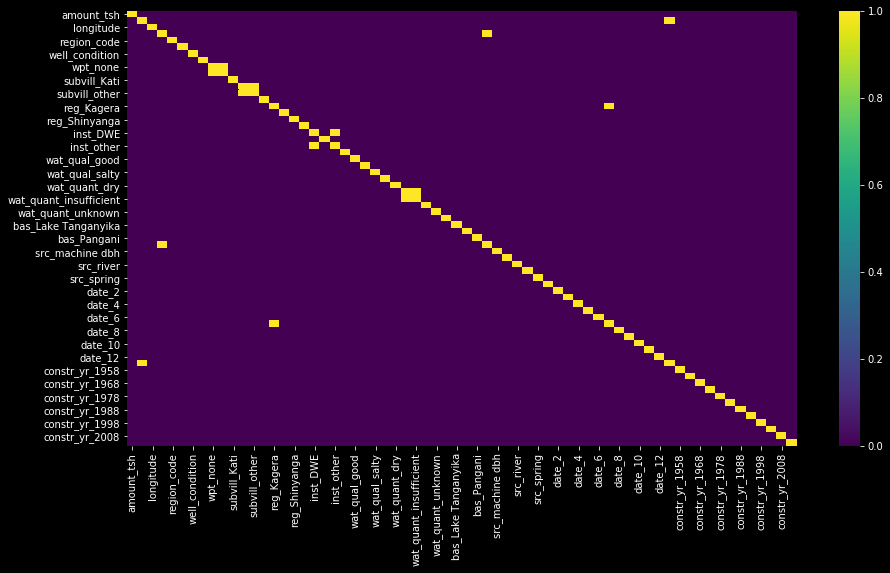

In [126]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_final.corr())> 0.70, cmap = 'viridis')

In [127]:
df_pairs = df_final.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['pairs'], inplace = True)
df_pairs.drop(columns = ['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['correlation']
df_pairs.drop_duplicates(inplace = True)

In [128]:
df_pairs[(df_pairs.correlation >.70) & (df_pairs.correlation <1)]

,correlation
pairs,
"(inst_other, inst_DWE)",0.898434
"(gps_height, constr_yr_0)",0.817173
"(bas_Rufiji, latitude)",0.810497
"(wpt_other, wpt_none)",0.803511
"(subvill_other, subvill_Madukani)",0.741467
"(reg_Kagera, date_7)",0.715594
"(wat_quant_insufficient, wat_quant_enough)",0.700321


In [129]:
df_final.drop(['wpt_none', 'bas_Pangani', 'inst_DWE'], axis = 1, inplace = True)

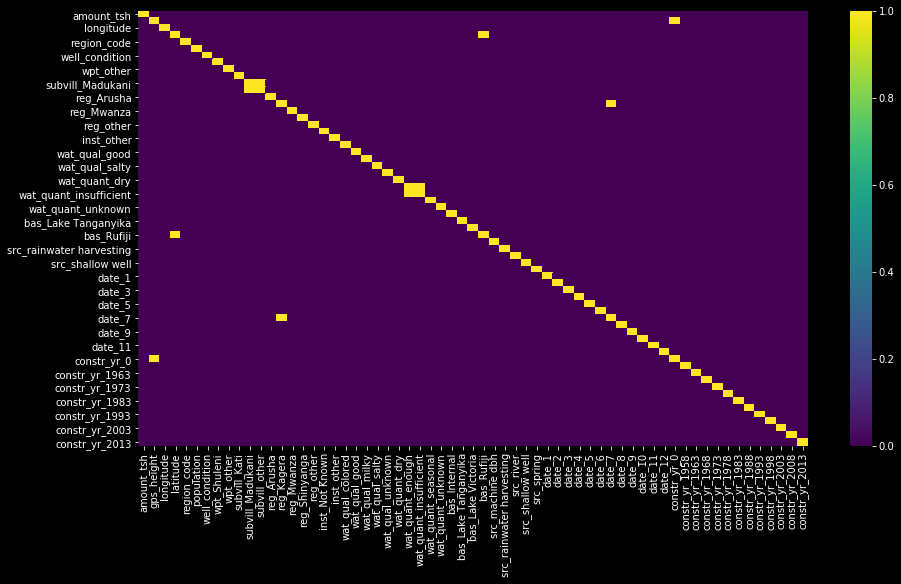

In [130]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_final.corr())> 0.70, cmap = 'viridis')

In [131]:
df_final.drop(['subvill_Madukani', 'wat_quant_dry', 'reg_Kagera', 'constr_yr_0', 'bas_Rufiji', 'wat_quant_enough'], axis = 1, inplace = True)

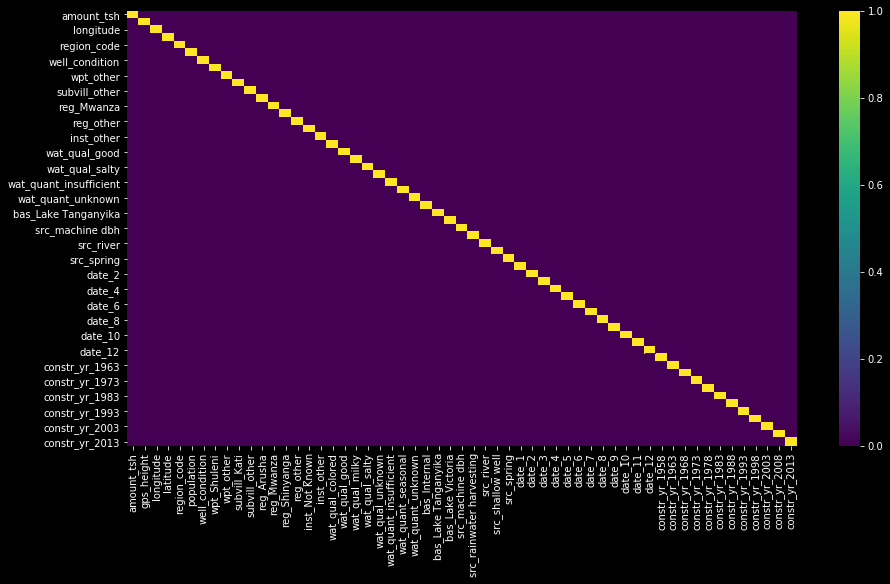

In [132]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_final.corr())> 0.70, cmap = 'viridis')

In [150]:
# Final Cleaned Data
df_final.head()

,amount_tsh,funder,gps_height,longitude,latitude,region_code,lga,ward,population,public_meeting,...,constr_yr_1968,constr_yr_1973,constr_yr_1978,constr_yr_1983,constr_yr_1988,constr_yr_1993,constr_yr_1998,constr_yr_2003,constr_yr_2008,constr_yr_2013
4,0.0,Action In A,0,31.130847,-1.825359,18,Karagwe,Nyakasimbi,0,True,...,0,0,0,0,0,0,0,0,0,0
6,0.0,Dwsp,0,33.362410,-3.766365,17,Shinyanga Rural,Samuye,0,True,...,0,0,0,0,0,0,0,0,0,0
7,0.0,Rwssp,0,32.620617,-4.226198,17,Kahama,Chambo,0,True,...,0,0,0,0,0,0,0,0,0,0
9,0.0,Isingiro Ho,0,30.626991,-1.257051,18,Karagwe,Kaisho,0,True,...,0,0,0,0,0,0,0,0,0,0
14,0.0,Biore,0,34.364073,-3.629333,17,Meatu,Nkoma,0,True,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24014 entries, 4 to 59398
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amount_tsh                24014 non-null  float64
 1   funder                    24014 non-null  object 
 2   gps_height                24014 non-null  int64  
 3   longitude                 24014 non-null  float64
 4   latitude                  24014 non-null  float64
 5   region_code               24014 non-null  int64  
 6   lga                       24014 non-null  object 
 7   ward                      24014 non-null  object 
 8   population                24014 non-null  int64  
 9   public_meeting            24014 non-null  object 
 10  recorded_by               24014 non-null  object 
 11  scheme_management         24014 non-null  object 
 12  permit                    24014 non-null  object 
 13  extraction_type           24014 non-null  object 
 14  paymen

# Model Building

We will start by selecting the features that were important in the Boruta algorithm. After much experimenting, I arrived with the conclusion of inputting these 12 features into my model before any hyperparameter tuning.

In [749]:
df_features = df_final[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'wat_qual_salty', 'date_7', 'date_8', 'constr_yr_2008', 
                        'population', 'src_shallow well', 'wat_quant_insufficient', 'src_machine dbh']]

In [750]:
df_features.head()

,amount_tsh,gps_height,longitude,latitude,wat_qual_salty,date_7,date_8,constr_yr_2008,population,src_shallow well,wat_quant_insufficient,src_machine dbh
4,0.0,0,31.130847,-1.825359,0,1,0,0,0,0,0,0
6,0.0,0,33.362410,-3.766365,0,0,0,0,0,0,0,1
7,0.0,0,32.620617,-4.226198,0,0,0,0,0,1,0,0
9,0.0,0,30.626991,-1.257051,0,0,1,0,0,1,0,0
14,0.0,0,34.364073,-3.629333,0,0,0,0,0,1,0,0


In [751]:
target = df_final['well_condition']

In [752]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size = 0.2, random_state = 123)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Before we head into the model building experimenting, let's create some helpful functions to assist in the process

In [753]:
def print_metrics(labels, preds):
    print('Precision Score: {}'.format(precision_score(labels, preds, average = None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average=None)))

In [754]:
def plot_cm(target, labels, name, target_classes=3):
    '''
    Args:
       target : True labels of the target variable 
       labels : Predicted labels of the target variable
       name : String; Name of the model to be specified as the title of the plot
       target_classes : Number of classes in the target variable 
    
    Returns:
        Plots confusion metrix.
        
    '''
    cm = confusion_matrix(target, labels) 
    
    # Transform to df for easier plotting
    if target_classes == 3:
        cm_df = pd.DataFrame(cm,
                             index = ['Functional','Non-Functional','Semi-Functional'], 
                             columns = ['Functional','Non-Functional','Semi-Functional'])
    else:
        cm_df = pd.DataFrame(cm,
                 index = ['Functional','Non-Functional','Semi-Functional'], 
                 columns = ['Functional','Non-Functional','Semi-Functional'])
        
    sns.heatmap(cm_df, annot=True, cmap='GnBu', vmax=60, annot_kws={"size": 14}, fmt='.3g')
    plt.title('{} \nAccuracy:{} \nWeighted F1 Score:{}'.format(name, 
                                        np.round(accuracy_score(target, labels),3),
                                        np.round(f1_score(target, labels, average='weighted'),3)),
               
             size=17)
    
    plt.ylabel('True label', size=15)
    plt.yticks(rotation=30) 
    plt.xlabel('Predicted label', size=15)

In [755]:
def plot_feature_importances(df, model, num):
    '''
    Args:
       df : Underlying datafarame of the model 
       model : Model to extract feature importances from
       num : Number of features to plot
    
    Returns:
        Plots a bar graph of feature importances of n features, in 
        in descending order of feature importances
    '''

    feat_importances = pd.Series(model.feature_importances_, index=df.columns)
    feat_importances.nlargest(num).plot(kind='barh', color =['skyblue', 'pink', 'lightgreen'])

In [756]:
pipeline_names = ['Decision Tree','Random Forest', 'Adaboost', 'Gradient Boosting', 'LogisticRegression']

In [757]:
pipe_tree = Pipeline([('clf', DecisionTreeClassifier(random_state=123))])
pipe_forest = Pipeline([('clf', RandomForestClassifier(random_state=123))])
pipe_adaboost = Pipeline([('clf', AdaBoostClassifier(random_state=123))])
pipe_gbt = Pipeline([('clf', GradientBoostingClassifier(random_state=123))])
pipe_log = Pipeline([('clf', LogisticRegression(random_state=123))])

# List of pipelines, List of pipeline names
pipelines = [pipe_tree, pipe_forest, pipe_adaboost, pipe_gbt, pipe_log]

for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train_scaled, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=123,
                                        splitter='best'))],
         verbose=False)
Pipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
        

In [758]:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
for index, val in enumerate(pipelines):
    print('%s : %.3f' % (pipeline_names[index], val.score(X_test_scaled, y_test)))
    
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
for index, val in enumerate(pipelines):
    print('%s : %.3f' % (pipeline_names[index],
                         f1_score(y_test, val.predict(X_test_scaled), average='weighted')))

----------------------------------------
Accuracy
----------------------------------------
Decision Tree : 0.638
Random Forest : 0.705
Adaboost : 0.589
Gradient Boosting : 0.644
LogisticRegression : 0.550

----------------------------------------
Weighted F1 Score
----------------------------------------
Decision Tree : 0.639
Random Forest : 0.699
Adaboost : 0.551
Gradient Boosting : 0.613
LogisticRegression : 0.465


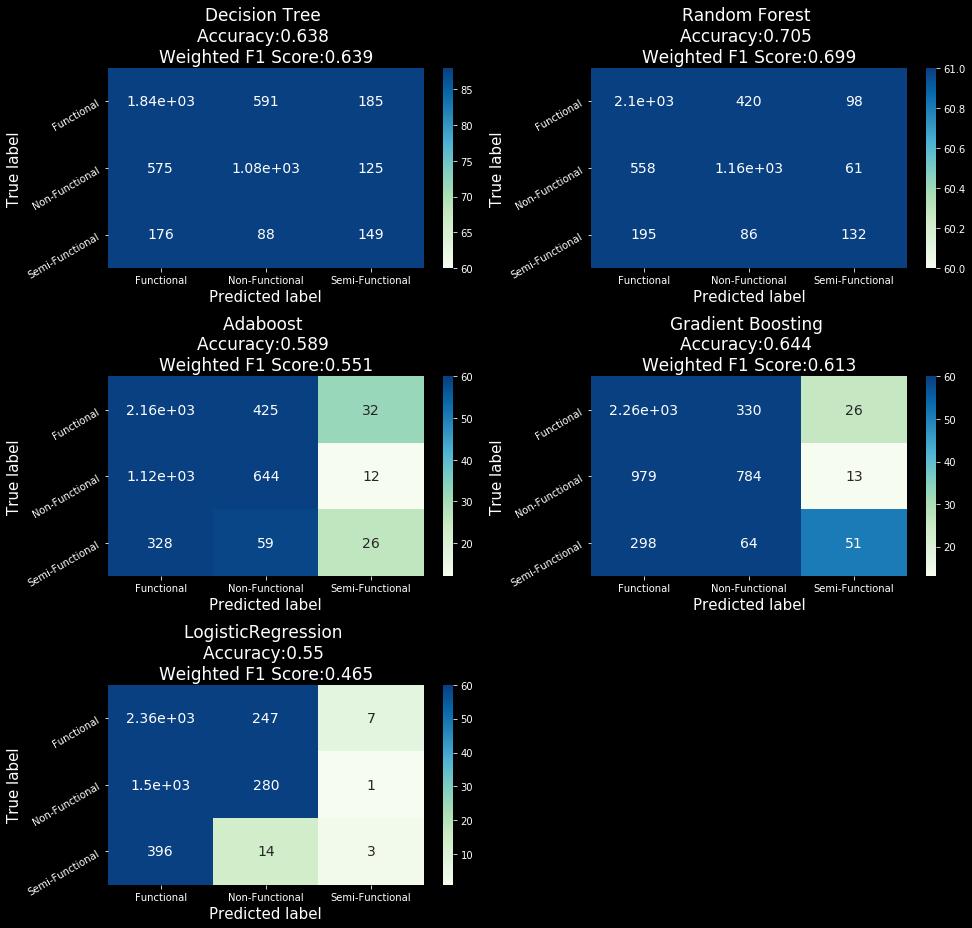

In [759]:
fig, ax = plt.subplots(3, 2, figsize=(14,13))
for index, val in enumerate(pipelines):
    plt.subplot(3,2,index+1)
    plot_cm(y_test, val.predict(X_test_scaled), pipeline_names[index], target_classes=2)
    
fig.tight_layout()
fig.delaxes(ax[-1,-1])
plt.show()

In [760]:
for index, val in enumerate(pipelines):
    print('----------------------------------------')
    print(pipeline_names[index])
    print('----------------------------------------')
    print(classification_report(y_test, val.predict(X_test)))


----------------------------------------
Decision Tree
----------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.01      0.01      2614
           1       0.36      0.62      0.46      1776
           2       0.08      0.32      0.12       413

    accuracy                           0.26      4803
   macro avg       0.34      0.32      0.20      4803
weighted avg       0.46      0.26      0.19      4803

----------------------------------------
Random Forest
----------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.70      0.63      2614
           1       0.44      0.39      0.41      1776
           2       0.00      0.00      0.00       413

    accuracy                           0.53      4803
   macro avg       0.34      0.36      0.35      4803
weighted avg       0.47      0.53      0.49      4803

----------------------------------------
Adabo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


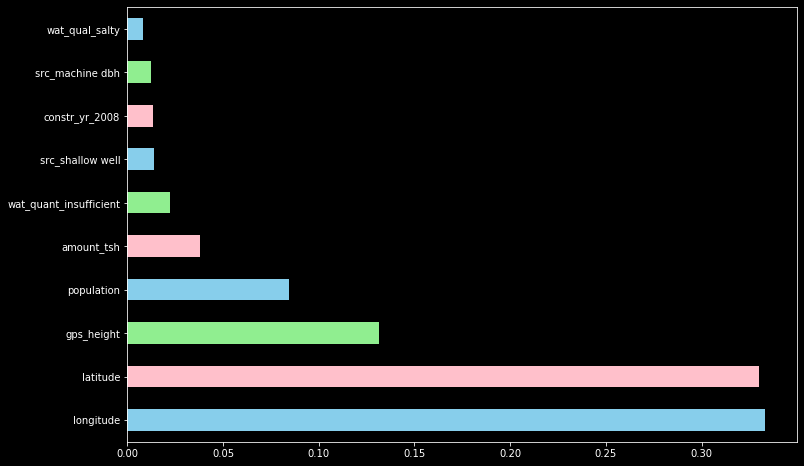

In [543]:
rf = pipelines[1].steps[0][1]
print(rf)

# Feature importances 
plt.figure(figsize=(12,8))
rf_feature_importance = plot_feature_importances(X_test, rf, 10)

# Randomized Search CV

In [518]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Create the random grid
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}

In [519]:
clf = RandomForestClassifier()

In [520]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=11, n_jobs = -1)

In [521]:
rf_random.fit(df_features, df_final['well_condition'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [522]:
rf_random.best_score_

0.6959689164370553